### requests
- 爬虫中一个基于网络请求的模块
- pip install requests
- 作用：模拟浏览器发起请求。
- 编码流程：
    - 1.指定url
    - 2.发起请求
    - 3.获取响应数据（爬取到的页面源码数据）
    - 4.持久化存储

- 爬取搜狗首页的页面源码数据

In [1]:
import requests

In [2]:
#1,指定url
url = 'https://www.sogou.com/'
#2,发起请求get方法的返回值为响应对象
response = requests.get(url=url)
#3，获取响应数据
#.text：返回的是字符串形式的响应数据
page_text = response.text
#4，持久化存储
with open('./sougou.html','w',encoding='utf-8') as fp:
    fp.write(page_text)

- 实现一个简易网页采集器
    - 基于搜狗针对指定不同的关键字将其对应的页面数据进行爬取
    - 参数动态化：
        - 如果请求的url携带参数，且我们想要将携带的参数进行动态化操作那么我们必须：
            - 1.将携带的动态参数以键值对的形式封装到一个字典中
            - 2.将该字典作用到get方法的params参数中即可
            - 3.需要将原始携带参数的url中将携带的参数删除

In [3]:
keyWord = input('enter a key word:')

#携带了请求参数的url，如果想要爬取不同关键字对应的页面，我们需要将url携带的参数进行动态化
#实现参数动态化：
params = {
    'query':keyWord
}
url = 'https://www.sogou.com/web'
#params参数（字典）：保存请求时url携带的参数
response = requests.get(url=url,params=params)

page_text = response.text
fileName = keyWord+'.html'
with open(fileName,'w',encoding='utf-8') as fp:
    fp.write(page_text)
print(fileName,'爬取完毕！！！')

enter a key word:jay
jay.html 爬取完毕！！！


- 上述简易采集器代码出现问题：
    - 1.乱码的问题
    - 2.数据丢失

- 解决乱码问题

In [4]:
keyWord = input('enter a key word:')

#携带了请求参数的url，如果想要爬取不同关键字对应的页面，我们需要将url携带的参数进行动态化
#实现参数动态化：
params = {
    'query':keyWord
}
url = 'https://www.sogou.com/web'
#params参数（字典）：保存请求时url携带的参数
response = requests.get(url=url,params=params)
#修改响应数据的编码格式
#encoding返回的是响应数据的原始的编码格式，如果给其赋值则表示修改了响应数据的编码格式
response.encoding = 'utf-8'
page_text = response.text
fileName = keyWord+'.html'
with open(fileName,'w',encoding='utf-8') as fp:
    fp.write(page_text)
print(fileName,'爬取完毕！！！')

enter a key word:jay
jay.html 爬取完毕！！！


- 处理乱码后，页面显示【异常访问请求】导致请求数据的缺失。
    - 异常的访问请求
        - 网站后台已经检测出该次请求不是通过浏览器发起的请求而是通过爬虫程序发起的请求。（不是通过浏览器发起的请求都是异常请求）
    - 网站的后台是如何知道请求是不是通过浏览器发起的呢？
        - 是通过判定请求的请求头中的user-agent判定的
    - 什么是User-Agent
        - 请求载体的身份标识
        - 什么是请求载体：
            - 浏览器
                - 浏览器的身份标识是统一固定，身份标识可以从抓包工具中获取。
            - 爬虫程序
                - 身份标识是各自不同

- 第二种反爬机制：
    - UA检测：网站后台会检测请求对应的User-Agent，以判定当前请求是否为异常请求。
- 反反爬策略：
    - UA伪装:被作用到了到部分的网站中，日后我们写的爬虫程序都默认带上UA检测操作。
    - 伪装流程：
        - 从抓包工具中捕获到某一个基于浏览器请求的User-Agent的值，将其伪装作用到一个字典中，将该字典作用到请求方法（get，post）的headers参数中即可。

In [5]:
keyWord = input('enter a key word:')
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}
#携带了请求参数的url，如果想要爬取不同关键字对应的页面，我们需要将url携带的参数进行动态化
#实现参数动态化：
params = {
    'query':keyWord
}
url = 'https://www.sogou.com/web'
#params参数（字典）：保存请求时url携带的参数
#实现了UA伪装
response = requests.get(url=url,params=params,headers=headers)
#修改响应数据的编码格式
#encoding返回的是响应数据的原始的编码格式，如果给其赋值则表示修改了响应数据的编码格式
response.encoding = 'utf-8'
page_text = response.text
fileName = keyWord+'.html'
with open(fileName,'w',encoding='utf-8') as fp:
    fp.write(page_text)
print(fileName,'爬取完毕！！！')

enter a key word:jay
jay.html 爬取完毕！！！


- 爬取豆瓣电影中的电影详情数据
    - url：https://movie.douban.com/typerank?type_name=%E5%8A%A8%E4%BD%9C&type=5&interval_id=100:90&action=
    - 动态加载数据的捕获
        - 什么叫做动态加载的数据？
            - 我们通过requests模块进行数据爬取无法每次都实现可见即可得。
            - 有些数据是通过非浏览器地址栏中的url请求到的数据，而是其他请求请求到的数据，那么这些通过其他请求请求到的数据就是动态加载的数据。
    - 如何检测网页中是否存在动态加载数据？
        - 基于抓包工具进行局部搜索。
            - 在当前网页中打开抓包工具，捕获到地址栏的url对应的数据包，在该数据包的response选项卡搜索我们想要爬取的数据，如果搜索到了结果则表示数据不是动态加载的，否则表示数据为动态加载的。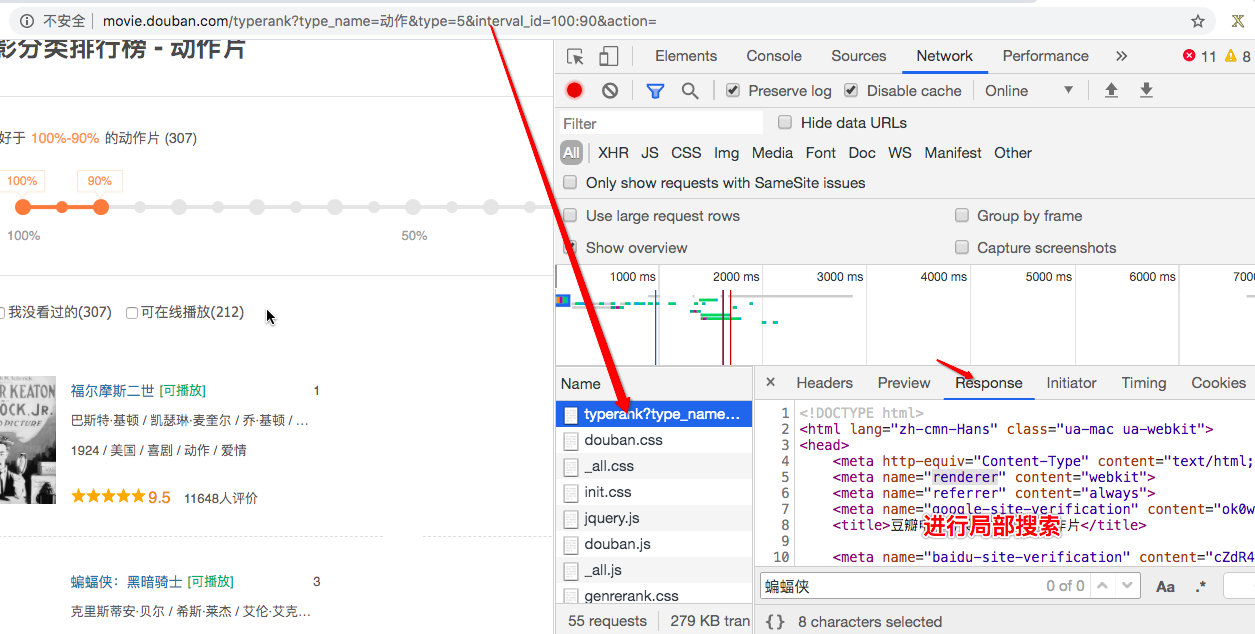

- 如果数据为动态加载，那么我们如何捕获到动态加载的数据？
    - 基于抓包工具进行全局搜索。
    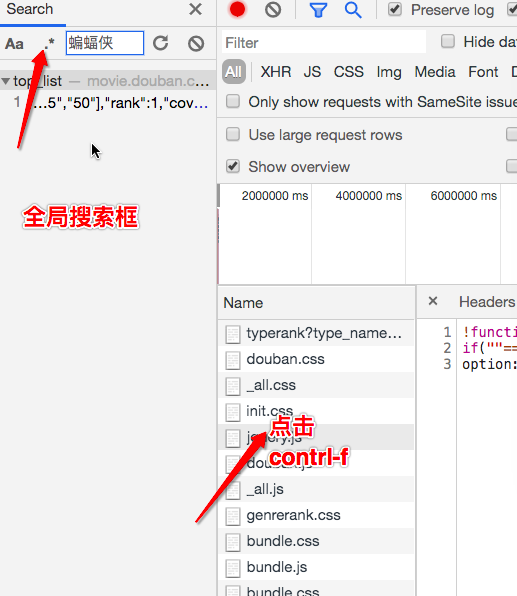
    - 定位到动态加载数据对应的数据包，从该数据包中就可以提取出
        - 请求的url
        - 请求方式
        - 请求携带的参数
        - 看到响应数据

In [11]:
url = 'https://movie.douban.com/j/chart/top_list'
params = {
    'type': '5',
    'interval_id': '100:90',
    'action': '',
    'start': '10',
    'limit': '50',
}
response = requests.get(url=url,params=params,headers=headers)
#.json()将获取的字符串形式的json数据序列化成字典或者列表对象
page_text = response.json()
#解析出电影的名称+评分
for movie in page_text:
    name = movie['title']
    score = movie['score']
    print(name,score)

攻壳机动队 9.0
赛文奥特曼 我是地球人 9.0
V字仇杀队 8.9
勇敢的心 8.9
乱 8.9
用心棒 8.9
让子弹飞 8.8
蝙蝠侠：黑暗骑士崛起 8.8
杀人回忆 8.8
谍影重重3 8.8
纵横四海 8.8
黑客帝国动画版 8.8
蝙蝠侠：黑暗骑士归来(下) 8.8
桥 8.8
头号玩家 8.7
阿凡达 8.7
超能陆战队 8.7
加勒比海盗 8.7
被解救的姜戈 8.7
英雄本色 8.7
黑客帝国3：矩阵革命 8.7
终结者2：审判日 8.7
黑鹰坠落 8.7
枪火 8.7
东邪西毒：终极版 8.7
精英部队2：大敌当前 8.7
椿三十郎 8.7
西线无战事 8.7
铁达尼号沉没记 8.7
蜘蛛侠：平行宇宙 8.6
东邪西毒 8.6
疯狂的麦克斯4：狂暴之路 8.6
新龙门客栈 8.6
谍影重重 8.6
谍影重重2 8.6
黑客帝国2：重装上阵 8.6
勇闯夺命岛 8.6
启示 8.6
恶童 8.6
宾虚 8.6
正义联盟：闪点悖论 8.6
敲开天堂的门 8.6
大菩萨岭 8.6
兽兵卫忍风帖 8.6
碧血金沙 8.6
落叶 8.6
滑铁卢战役 8.6
复仇者联盟4：终局之战 8.5
釜山行 8.5
功夫 8.5


- 思考：基于抓包工具进行全局搜索不一定可以每次都能定位到动态加载数据对应的数据包？
- 原因：如果动态加载的数据是经过加密的密文数据。

- 分页数据的爬取操作
    - 爬取肯德基的餐厅位置数据
        - url：http://www.kfc.com.cn/kfccda/storelist/index.aspx
- 分析：
    - 1.在录入关键字的文本框中录入关键字按下搜索按钮，发起的是一个ajax请求
        - 当前页面刷新出来的位置信息一定是通过ajax请求请求到的数据
    - 2.基于抓包工具定位到该ajax请求的数据包，从该数据包中捕获到：
        - 请求的url
        - 请求方式
        - 请求携带的参数
        - 看到响应数据
        

In [12]:
#爬取的是第一页的数据
url = 'http://www.kfc.com.cn/kfccda/ashx/GetStoreList.ashx?op=keyword'
data = {
    'cname': '',
    'pid': '',
    'keyword': '北京',
    'pageIndex': '1',
    'pageSize': '10',
}
#data参数是post方法中处理参数动态化的参数
response = requests.post(url=url,headers=headers,data=data)
page_text = response.json()
for dic in page_text['Table1']:
    title = dic['storeName']
    addr = dic['addressDetail']
    print(title,addr)

育慧里 小营东路3号北京凯基伦购物中心一层西侧
京通新城 朝阳路杨闸环岛西北京通苑30号楼一层南侧
黄寺大街 黄寺大街15号北京城乡黄寺商厦
四季青桥 西四环北路117号北京欧尚超市F1、B1
亦庄 北京经济开发区西环北路18号F1＋F2
石园南大街 通顺路石园西区南侧北京顺义西单商场石园分店一层、二层部分
北京站广场 北京站一层
北京南站 北京南站候车大厅B岛201号
北清路 北京北清路1号146区
大红门新世纪肯德基餐厅 海户屯北京新世纪服装商贸城一层南侧


In [15]:
#爬取多页
#爬取的是第一页的数据
url = 'http://www.kfc.com.cn/kfccda/ashx/GetStoreList.ashx?op=keyword'
for page in range(1,9):
    data = {
        'cname': '',
        'pid': '',
        'keyword': '北京',
        'pageIndex': str(page),
        'pageSize': '10',
    }
    #data参数是post方法中处理参数动态化的参数
    response = requests.post(url=url,headers=headers,data=data)
    page_text = response.json()
    for dic in page_text['Table1']:
        title = dic['storeName']
        addr = dic['addressDetail']
        print(title,addr)

育慧里 小营东路3号北京凯基伦购物中心一层西侧
京通新城 朝阳路杨闸环岛西北京通苑30号楼一层南侧
黄寺大街 黄寺大街15号北京城乡黄寺商厦
四季青桥 西四环北路117号北京欧尚超市F1、B1
亦庄 北京经济开发区西环北路18号F1＋F2
石园南大街 通顺路石园西区南侧北京顺义西单商场石园分店一层、二层部分
北京站广场 北京站一层
北京南站 北京南站候车大厅B岛201号
北清路 北京北清路1号146区
大红门新世纪肯德基餐厅 海户屯北京新世纪服装商贸城一层南侧
巴沟 巴沟路2号北京华联万柳购物中心一层
北京站宝宸 北京站街22号一层+二层
欢乐谷 南磨房乡小武基北路北京欢乐谷内欢乐时光区一层
亦庄沃尔玛 经济技术开发区文化园东路6号北京经开汇展中心1-2层
北京站Select 北京火车站候车大厅一层西侧原商务中心
西客站内三 莲花桥东路118号北京西客站候车大厅内2层第4营业厅及2层夹层回廊
通州北苑华联 杨庄北里五十二号天时名苑小区十四号楼北京华联南侧一层
日照银座餐厅 北京路与泰安路交汇处银座商城一楼
荆州北京路 沙区北京中路227号肯德基餐厅
荆州月亮湾 沙市区北京路中路173号
荆州美佳华 北京路美佳华A128号
金山 建新镇金山大道100号北京金山05店面
北京南站三 北京南站地下一层南大门内东侧场地快速进站口3与快速进站口4中间
北京南站六 北京南站二层旅客出发层西南角（23B检票口）旁
北京站广场二 北京站进站口西侧前廊下
马坡汽车穿梭 马坡镇顺城大街29号北京乡村乐园一层
新城外城DT 南四环成寿寺路308号北京城外诚家居广场停车广场
铁路 北京南路895号豪威大厦1层肯德基餐厅
苏州路 北京南路28号家乐福苏州路购物中心一层肯德基餐厅
蒙苑 兴安北路169号北京华联一层
南昌 南昌路982号新北京华联一层
太原府东 府东街18号北京华联超一层
金利 新华路138号鑫乐广场（北京华联超市旁）
芜湖营盘山路 北京东路与营盘山路交叉口大润发超市一楼
钢铁大街 钢铁大街与三八路交汇处西北角北京华联超市底店
阜阳火车站 向阳路和北京东路交汇口
淮安北京路苏果 北京新村五区新苑逸城
小河 黔江路29号北京华联一层
金阳82266155 金阳新区北京西路金源时代购物中心一层
国酒路 仁怀市中枢镇酒都新区国酒大道超一时代广场一楼北京华联旁
白云 北京路延长线大白庙

# 今日作业
- 爬取药监总局中的企业详情数据
- url：http://125.35.6.84:81/xk/
- 需求：
    - 将首页中每一家企业的详情数据进行爬取。
        - 每一家企业详情页对应的数据
    - 将前5页企业的数据爬取即可。
- 难点：
    - 用不到数据解析
    - 所有的数据都是动态加载出来
- 提示：先试着将一家企业的详情页的详情数据爬取出来，然后再去爬取多家企业的数据。